# Objective
        In this notebook, I test the Nested Sampling module by doing parameter estimation with two simulated datasets.
        
 ### 1. A cubic model     : $ax^3 + bx^2 + cx + d$
 ### 2. A sinusodial model : $axsin(bx+c)$

In [1]:
########################Import Modules##########################################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import corner
import time
import scipy as sp
import Nested_Sampling_3 as NS3

#test numba
from numba import jit , prange
####Import test mcmc module

import Metropolis_Hasting_3_0T as MH3
import Functions as F



#####################################

In [2]:
def mcmc_explorer(theta):
    """ Exploration technique used for generating a new sample in nested sampling
    
    Parameters
    ---------------
    theta : array
            Sample to start mcmc from
            
    -------------
    Returns: 
        
    chain_particle : array
                    mcmc sample chain
    
    chain_loglike :array
                   loglikelihood value of each sample
                   
    chain_prior   : array
                    prior value of each sample
    
    Acceptance_R  : scalar
                    Acceptance ratio of the mcmc chain"""
    
    chain_particle , chain_loglike , chain_prior , Acceptance_R = MH3.MH_mcmc(F.logLikelihood_cubic,F.Prior,\
                                                    theta,args_loglike,args_prior,mcmc_steps,stepsize)
    
    return chain_particle , chain_loglike , chain_prior , Acceptance_R 

In [3]:
def prior_transform_1(u):
    """Draw a sample from a uniform prior distribution for each parameter
    
    Returns : array
            A sample of each paramater dran from the prior.
    """
    
    a = u[0]*30
    b = u[1]*20
    c = u[2]*20
    d = u[3]*20
    
    sample = np.array([a,b,c,d])
    
    return sample

## Read simulated data : Cubic

Text(0,0.5,'y')

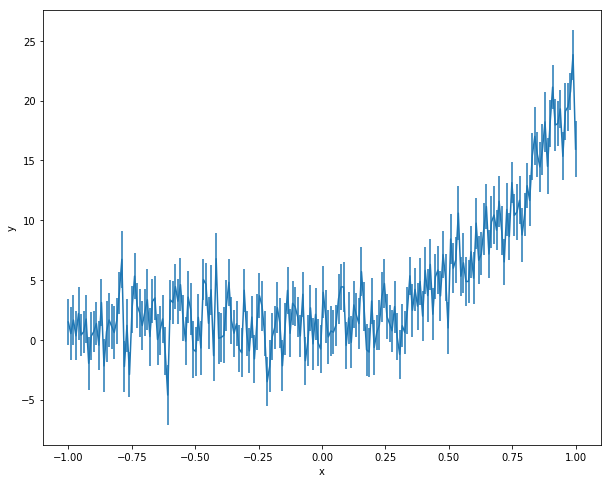

In [4]:
Data  = pd.read_csv('example_cubic_data.txt', delimiter = ' ', names = ['x', 'y', 'err'])

x_values = Data.x
y_values = Data.y
error = Data.err

plt.figure(figsize=(10,8))
plt.errorbar(x_values, y_values, yerr=error)
plt.xlabel('x')
plt.ylabel('y')

## Draw N samples from unifor prior

In [5]:
# Generate N samples
nlive_points = 600


#Parameter limits
param_limits = np.array([[0,30],[0,20],[0,20],[0,20]])

#Likelihood function arguments
args_loglike = [y_values, error, x_values]

#Prior function arguments
args_prior = np.array(param_limits)



### Initialize nested sampling and mcmc parameters

In [6]:
# Number of NS iterations
nest_steps = 6000

# MCMC steps per NS iteration
mcmc_steps = 40

# mcmc stepsize
param_step =  [.5,.5,.3,.28] 
stepsize = np.array(param_step) 

#Number of parameters
num_params = 4

def loglikelihood_cubic(theta):
    
    return F.logLikelihood_cubic(theta,args_loglike)

def Prior_cubic(theta):
    
    return F.Prior(theta,args_prior)

### Instantiate Nested Sampling 

In [7]:
Cubic_example = NS3.Nested_Sampling(loglikelihood_cubic,Prior_cubic, num_params,prior_transform_1, nest_steps,\
                                   nlive_points,mcmc_explorer)

Begin Drawing Live points from prior...
No. live points :  600
End Draw!


## Run Nested Sampler

In [8]:
Cubic_example.nestedsampler()

N/A% (0 of 6000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Begin nested sampling...
No. of runs :  6000
No. of parameters :  4


 99% (5999 of 6000) |################### | Elapsed Time: 0:16:09 ETA:   0:00:00


logZ = -413.86442060064377 
Information = 4198 nats

End nested sampling.


### Analyze results

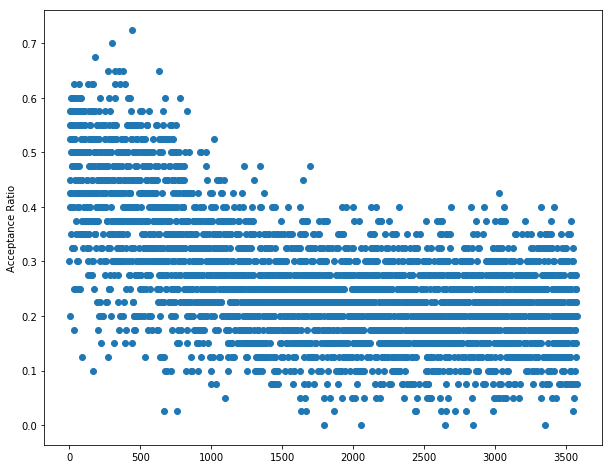

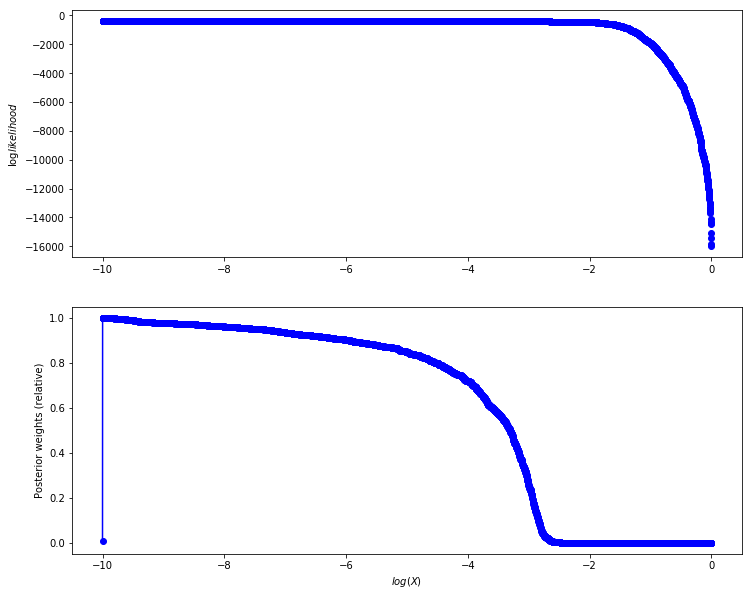

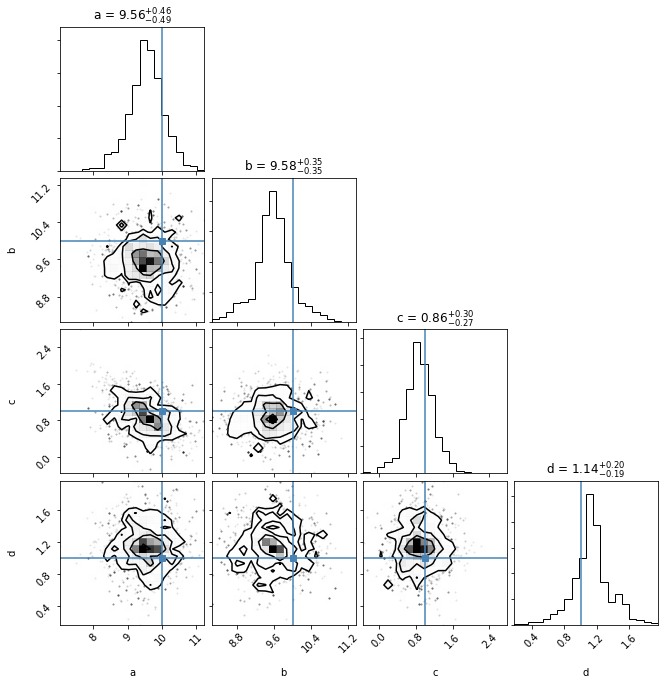

In [9]:
Cubic_example.analyze(labels=['a','b','c','d'],truths=[10,10,1,1])

In [ ]:
Cubic_example.logZ_distribution(nsize=5000)

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------
##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [70]:
import Nested_Sampling_3_1 as NS

In [71]:
def explorer_sine(theta):
    """ Exploration technique used for generating a new sample in nested sampling
    
    Parameters
    ---------------
    theta : array
            Sample to start mcmc from
            
    -------------
    Returns: 
        
    chain_particle : array
                    mcmc sample chain
    
    chain_loglike :array
                   loglikelihood value of each sample
                   
    chain_prior   : array
                    prior value of each sample
    
    Acceptance_R  : scalar
                    Acceptance ratio of the mcmc chain"""
    draw_uniform = lambda: np.random.uniform(0, 1, size=ndim)
    
    
    u = draw_uniform()
    particle  = prior_transform(u)
    loglike   =  F.logLikelihood(particle,args_loglike_sine)
    prior     = F.Prior(particle,args_prior_sine)
    
    return particle , loglike , prior 

In [72]:
def prior_transform(u):
    """Draw a sample from a uniform prior distribution for each parameter
    
    Returns : array
            A sample of each paramater dran from the prior.
    """
    
    a = u[0]*5
    c = u[1]*5
    b = u[2]*5
        
    sample = np.array([a,b,c])
    
    return sample

## Read Sinusoidal data

Text(0,0.5,'y')

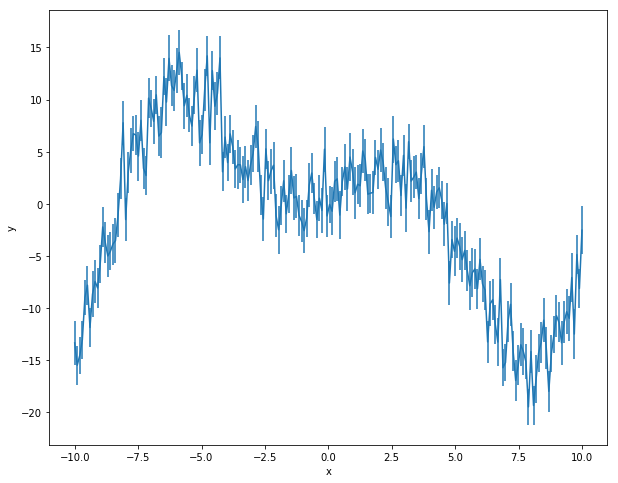

In [73]:
Data_sine  = pd.read_csv('example_data.txt', delimiter = ' ', names = ['x', 'y', 'err'])

x_values_sine = Data_sine.x
y_values_sine   = Data_sine.y
error_sine = Data_sine.err

plt.figure(figsize=(10,8))
plt.errorbar(x_values_sine, y_values_sine, yerr=error_sine)
plt.xlabel('x')
plt.ylabel('y')

### Draw N samples from unifor prior

In [75]:
# Generate N samples
nlive_points = 500


#Parameter limits
param_limits_sine = np.array([[0,5],[0,5],[0,5]])

#Likelihood function arguments
args_loglike_sine = [y_values_sine, error_sine, x_values_sine]

#Prior function arguments
args_prior_sine = np.array(param_limits_sine)


def loglikelihood(theta):
    
    return F.logLikelihood(theta,args_loglike_sine)

def Prior(theta):
    
    return F.Prior(theta,args_prior_sine)



In [85]:
# Number of NS iterations
nest_steps_sine = 100000

# MCMC steps per NS iteration
mcmc_steps_sine = 70

# mcmc stepsize
param_step_sine =  [.2,.3,.2] 
stepsize_sine = np.array(param_step_sine) 

#Number of parameters
ndim = 3

### Instantiate Nested Sampling 

In [86]:
Sine_example = NS.Nested_Sampling(loglikelihood,Prior, ndim,prior_transform, nest_steps_sine,\
                                   nlive_points,explorer_sine)

Begin Drawing Live points from prior...
No. live points :  500
End Draw!


## Run Nested Sampler

In [87]:
Sine_example.nestedsampler()

  0% (35 of 100000) |                    | Elapsed Time: 0:00:00 ETA:   0:04:47

Begin nested sampling...
No. of runs :  100000
No. of parameters :  3


 99% (99975 of 100000) |################ | Elapsed Time: 0:02:59 ETA:   0:00:00


logZ = -1277.9652978001864 
Information = 1488 nats

End nested sampling.


### Analyze results

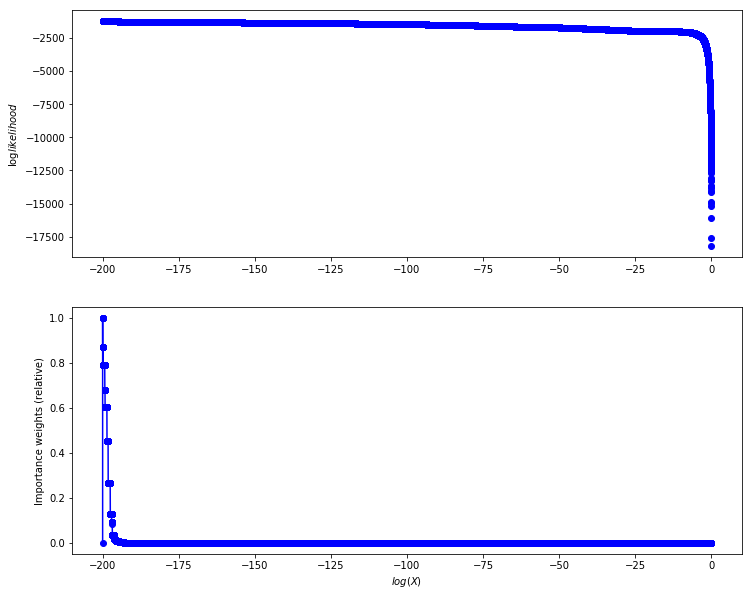

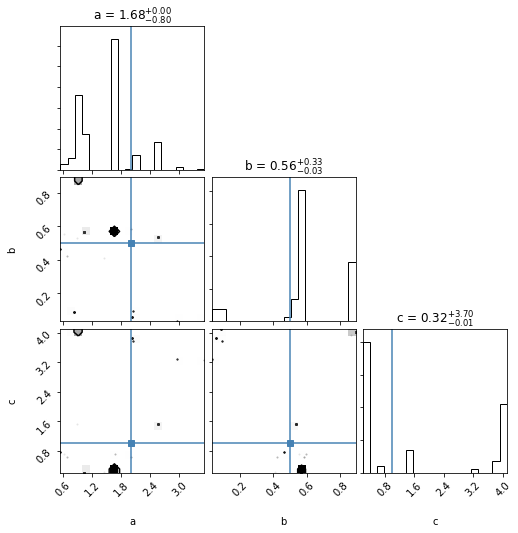

In [88]:
Sine_example.analyze(labels=['a','b','c'],truths=[2,0.5,1])

In [80]:
Sine_example.logZ_distribution(nsize=5000)

AttributeError: 'numpy.ndarray' object has no attribute 'append'